### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

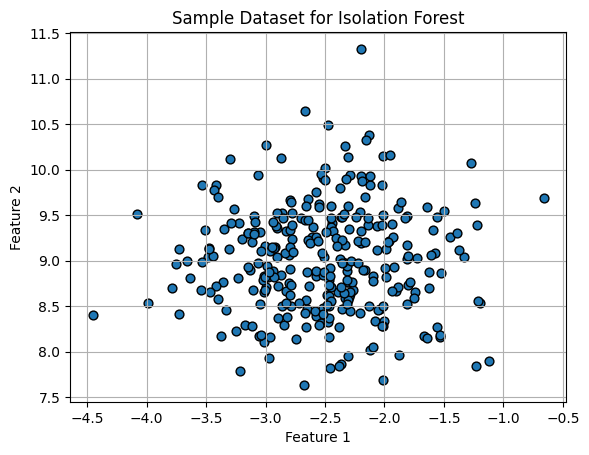

In [6]:
# write your code from here
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', s=40)
plt.title("Sample Dataset for Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

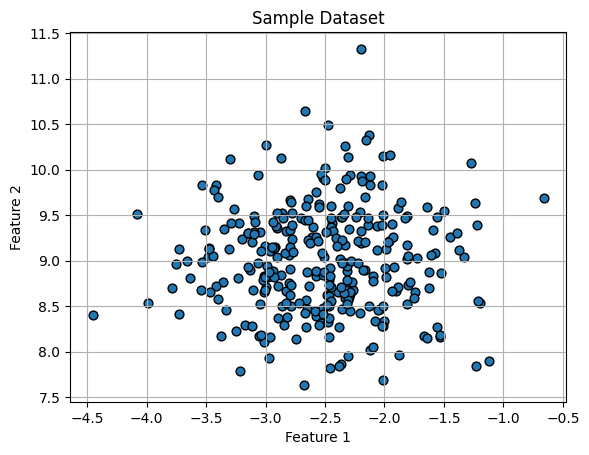

In [7]:
# write your code from here

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', s=40)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [8]:
# write your code from here
from sklearn.ensemble import IsolationForest
import numpy as np

# Step 1: Fit the Isolation Forest model (if not done already)
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)

# Step 2: Predict anomalies
# -1 = anomaly, 1 = normal
predictions = iso_forest.predict(X)

# Step 3: Count anomalies
unique, counts = np.unique(predictions, return_counts=True)
anomaly_counts = dict(zip(unique, counts))

print("Anomaly Detection Results:")
print(f"Normal points (1): {anomaly_counts.get(1, 0)}")
print(f"Anomalies (-1): {anomaly_counts.get(-1, 0)}")


Anomaly Detection Results:
Normal points (1): 270
Anomalies (-1): 30


### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

anomaly
normal     285
anomaly     15
Name: count, dtype: int64


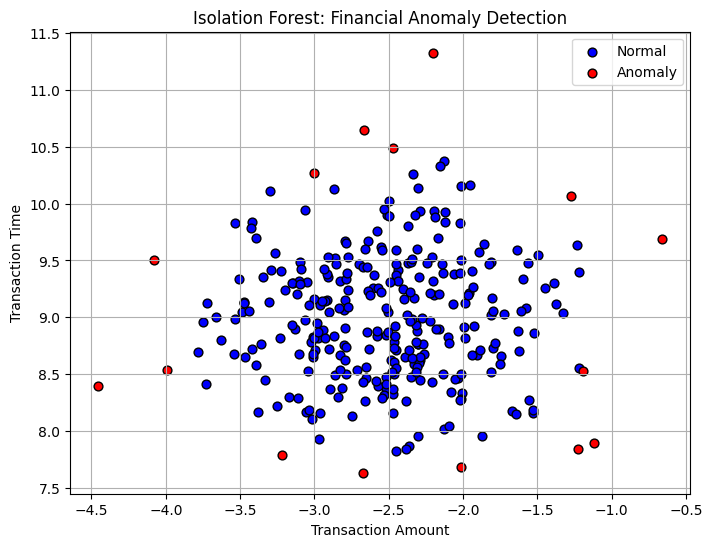

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

def validate_dataframe(df):
    """
    Validate the integrity of the input DataFrame.
    
    Checks:
        - No missing values.
        - All columns are numeric.
        - Sufficient number of samples.
    """
    if df.isnull().values.any():
        raise ValueError("Input DataFrame contains null values.")
    if not all([np.issubdtype(dtype, np.number) for dtype in df.dtypes]):
        raise TypeError("All columns must be numeric.")
    if df.shape[0] < 10:
        raise ValueError("Insufficient number of samples to detect anomalies.")
        
def detect_anomalies(df, contamination=0.05, random_state=42):
    """
    Detect anomalies using Isolation Forest.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing numeric data to process.
        contamination (float): Proportion of outliers in the data.
        random_state (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: DataFrame with an 'anomaly' column indicating detected anomalies.
    """
    # Validate the DataFrame before processing
    validate_dataframe(df)

    # Create and fit the Isolation Forest model
    model = IsolationForest(contamination=contamination, random_state=random_state)
    model.fit(df)

    # Make predictions: 1 = normal, -1 = anomaly
    preds = model.predict(df)
    df['anomaly'] = np.where(preds == -1, 'anomaly', 'normal')
    
    return df

def visualize_anomalies(df):
    """
    Visualizes anomalies detected by the Isolation Forest.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'anomaly' column.
    """
    plt.figure(figsize=(8, 6))
    
    # Normal points
    plt.scatter(df[df['anomaly'] == 'normal']['Amount'],
                df[df['anomaly'] == 'normal']['Time'],
                c='blue', label='Normal', edgecolor='k', s=40)
    
    # Anomalies
    plt.scatter(df[df['anomaly'] == 'anomaly']['Amount'],
                df[df['anomaly'] == 'anomaly']['Time'],
                c='red', label='Anomaly', edgecolor='k', s=40)
    
    plt.title("Isolation Forest: Financial Anomaly Detection")
    plt.xlabel("Transaction Amount")
    plt.ylabel("Transaction Time")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution - Generating synthetic financial data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)
data = pd.DataFrame(X, columns=['Amount', 'Time'])

# Call the anomaly detection function
try:
    result_df = detect_anomalies(data, contamination=0.05, random_state=42)
    print(result_df['anomaly'].value_counts())
    visualize_anomalies(result_df)
except Exception as e:
    print("Error:", e)

### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

Contamination: 0.01 → Anomalies detected: 3


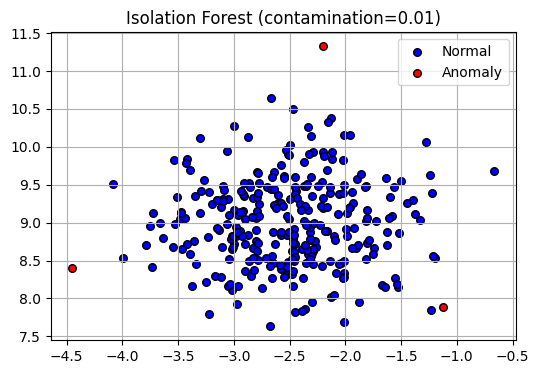

Contamination: 0.05 → Anomalies detected: 15


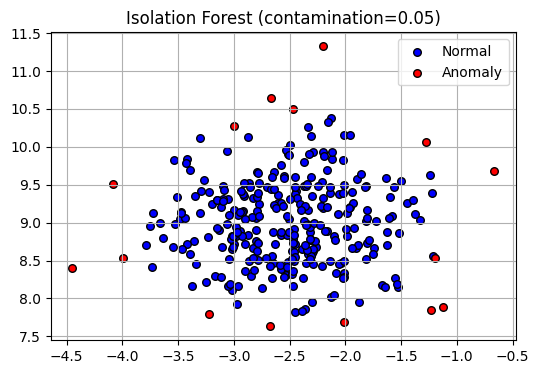

Contamination: 0.1 → Anomalies detected: 30


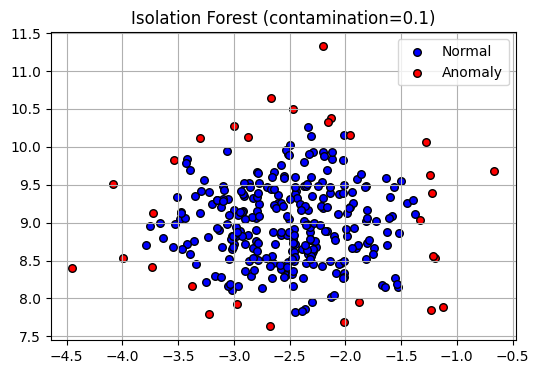

Contamination: 0.2 → Anomalies detected: 60


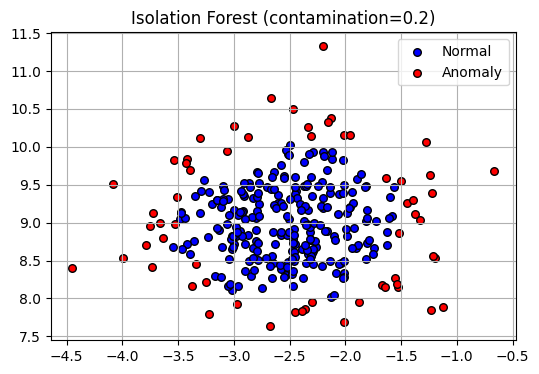

In [10]:
# write your code from here

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# Try different contamination levels
contamination_values = [0.01, 0.05, 0.1, 0.2]

for contam in contamination_values:
    # Fit Isolation Forest
    model = IsolationForest(contamination=contam, random_state=42)
    model.fit(X)
    preds = model.predict(X)
    
    # Count anomalies
    unique, counts = np.unique(preds, return_counts=True)
    anomaly_count = dict(zip(unique, counts)).get(-1, 0)
    print(f"Contamination: {contam} → Anomalies detected: {anomaly_count}")
    
    # Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(X[preds == 1, 0], X[preds == 1, 1], c='blue', label='Normal', s=30, edgecolor='k')
    plt.scatter(X[preds == -1, 0], X[preds == -1, 1], c='red', label='Anomaly', s=30, edgecolor='k')
    plt.title(f"Isolation Forest (contamination={contam})")
    plt.legend()
    plt.grid(True)
    plt.show()